## Project: Life Expectancy and Changes in GDP

This project will explore whether there is a correlation between the economic output of a country (i.e. Growth Domestic Product; GDP) and the life expectancy of its citizens. This will be accomplished through analysing data from the World Bank and World Health Organization, using various graphing techniques to identify trends and explain its significance for this study.

Through this project, the following questions will be explored:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Importing Python Modules into jupyter notebook

For the purpose of this investigation, the following modules are imported.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Loading the dataset into notebook 

To look for connections between GDP and life expectancy load the datasets into DataFrames so that they can be visualized.

Here **all_data.csv** will be read in into a DataFrame called `df`, followed by a quick inspection of the DataFrame using `.head()` to check its contents.

In [2]:
df = pd.read_csv('all_data.csv')

In [3]:
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


## Observing data types 

In [4]:
df.info

<bound method DataFrame.info of      Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]>

Dataset has been loaded. There are 96 rows and 4 columns in this dataset.

In [5]:
print(df.dtypes)

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


## Exploration of the unique countries in the dataset

First, more needs to be explored about the countries that are represented in `df`. There seems to be six countries, Chile, China, Germany, Mexico, the US, and Zimbabwe represented in the data.

In [6]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


## Exploration of the unique years in the dataset

The next step is to find out which years are represented in the data, and they are 2000-2015.

In [7]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Cleaning Column Name 

Looking over the data, there are inconsistencies with the column names. For example, the first two column names are one word each, while the third is five words long! `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. The `rename` function is used to change the column name to `LEABY`.

In [8]:
df = df.rename(columns={'Life expectancy at birth (years)':'LEABY'})
print(df.head())

  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10


Look at the distribution of GDP and life expectancy

<Figure size 800x600 with 0 Axes>

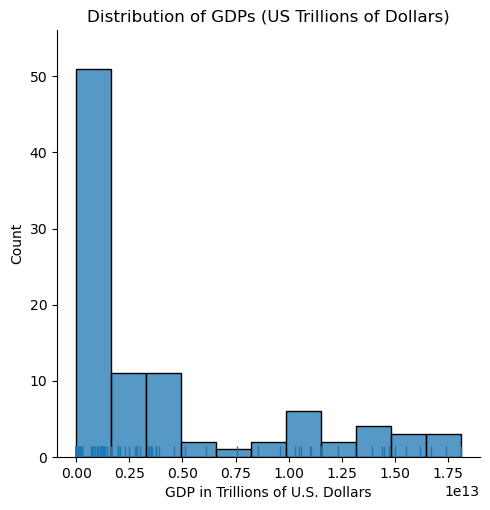

In [9]:
plt.figure(figsize=(8,6))
sns.displot(df.GDP, rug = True, kde=False)
plt.title('Distribution of GDPs (US Trillions of Dollars)')
plt.xlabel("GDP in Trillions of U.S. Dollars");

<Figure size 800x600 with 0 Axes>

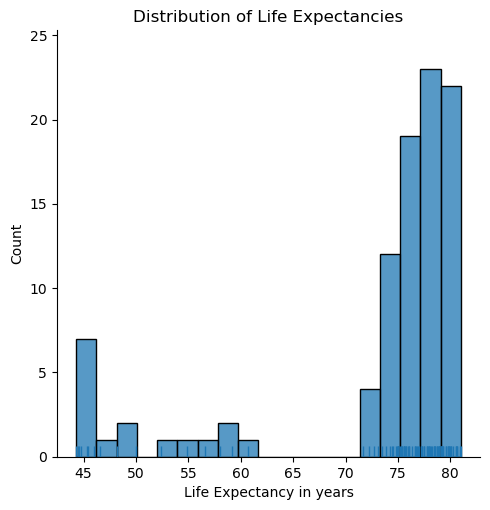

In [10]:
plt.figure(figsize=(8,6))
sns.displot(df.LEABY, rug = True, kde=False)
plt.title('Distribution of Life Expectancies')
plt.xlabel("Life Expectancy in years");

Find the average life expectancy and GDP of each country, drop the column 'year'.

In [11]:
dfMeans = df.drop('Year', axis = 1).groupby('Country').mean().reset_index()
print(dfMeans)

                    Country     LEABY           GDP
0                     Chile  78.94375  1.697888e+11
1                     China  74.26250  4.957714e+12
2                   Germany  79.65625  3.094776e+12
3                    Mexico  75.71875  9.766506e+11
4  United States of America  78.06250  1.407500e+13
5                  Zimbabwe  50.09375  9.062580e+09


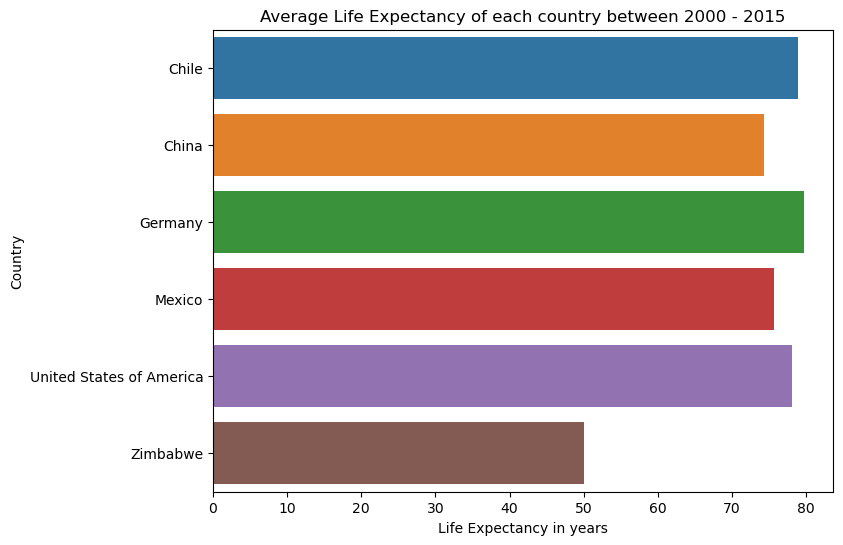

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x="LEABY", y="Country", data=dfMeans)
plt.title('Average Life Expectancy of each country between 2000 - 2015')
plt.xlabel('Life Expectancy in years')
plt.show();

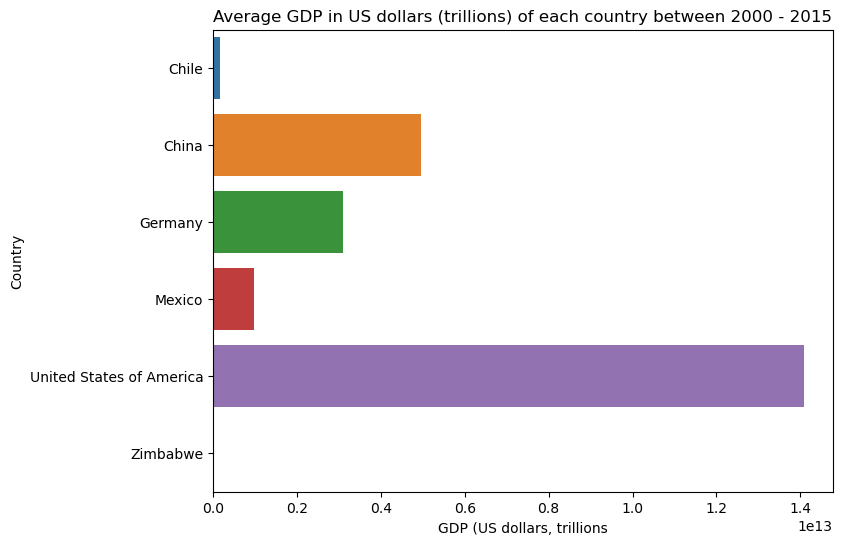

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=dfMeans)
plt.title('Average GDP in US dollars (trillions) of each country between 2000 - 2015')
plt.xlabel('GDP (US dollars, trillions')
plt.show();

## How has the life expectancy changed for the six countries?

The following section will use the seaborn function to plot a line graph. The purpose of the graph is to identify have trends in the life expectancy of each population over the time period of 2000 - 2015. This visualisation will allow us to also identify any sudden changes which might require additional research to explain.

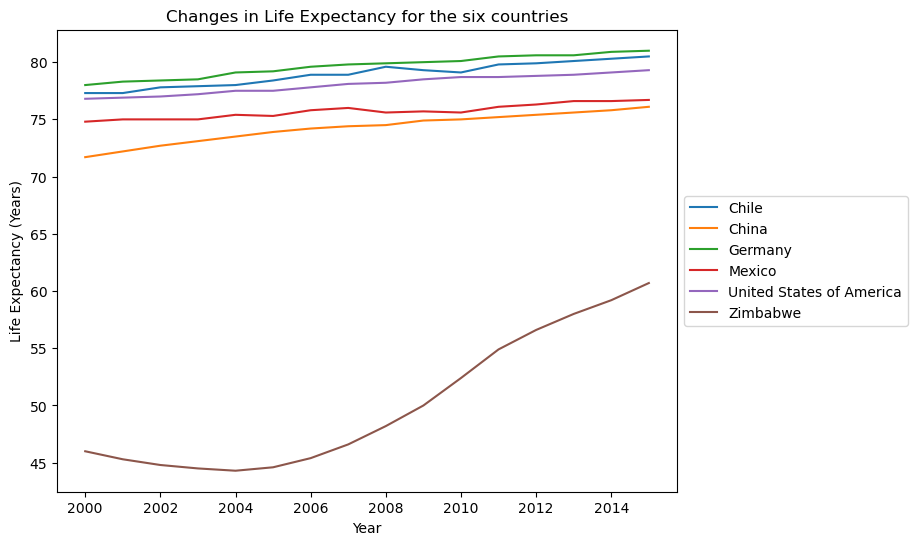

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(8,6))
sns.lineplot(x = df.Year, y = df.LEABY, hue = df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Changes in Life Expectancy for the six countries')
plt.ylabel('Life Expectancy (Years)')
plt.show()
plt.clf()

- The trend shows an increase in the life expectancy of its citizens for all six countries.
- There appears to be a slight decrease in life expectancy for Zimbabwe between 2000 - 2004 before seeing rapid growth afterwards.
- From the six countries, Zimbabwe has the fastest growth in life expectancy; however, its average (61 years in 2015) is also much lower than the other five countries (70s - 80s in 2015).

To provide a more in-depth analysis of each country's changes in life expectancy, facet line plots by country was implemented. This allowed each country to have its own scaled y-axis, which makes it easier to identify the changes for the individual country that may have been hidden by the initial line plot; due to having the same scaled y-axis.


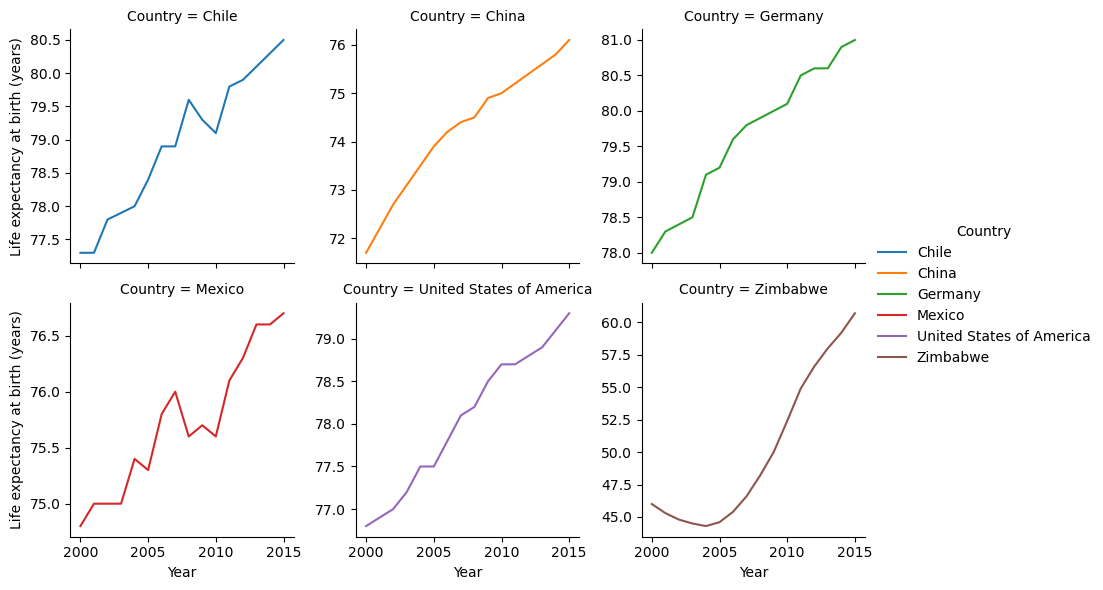

In [15]:
graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEABY;

- Similar to the line plot above, all six countries observed a relatively linear growth (though some changes were smoother than others) in their citizen's life expectancy.
- From the facet line plot, we can also see slight dips in the life expectancy for Chile and Mexico at roughly similar times (2007 - 2010); this will be noted for further investigation.




#### Additional Visualises - Violin Plot

The violin plot is used to show the shape of the distribution compared to the box plot. Below, country is on the x-axis and the distribution of numeric columns : `GDP` and `LEABY` are on the y axis. 

In the `GDP` plot on the left, China and the US have a relatively wide range, where Zimbabwe, Chile, and Mexico have shorter ranges. 

In the `LEABY` plot, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s.

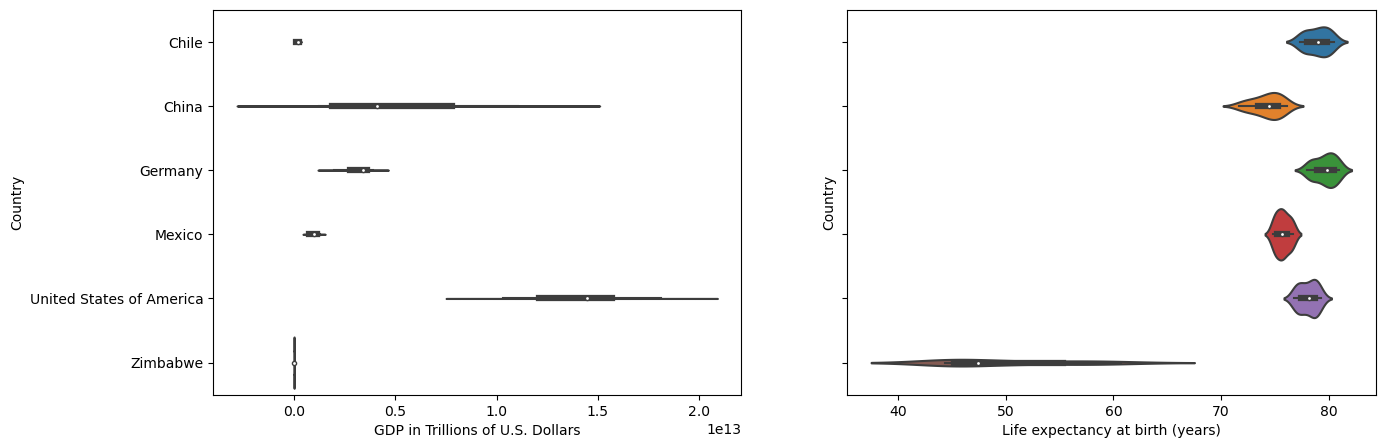

In [16]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

#### Swarm Plots

Swarm plots are useful because they show dot density around the values as well as distribution through area/shape. 

In the case of of the `GDP` plot on the left, Chile and Zimbabwe have a vertical line of dots that illustrate the number of data points that fall around their values. This detail would have been lost in the box plot, unless the reader is very adept at data visualizations. 



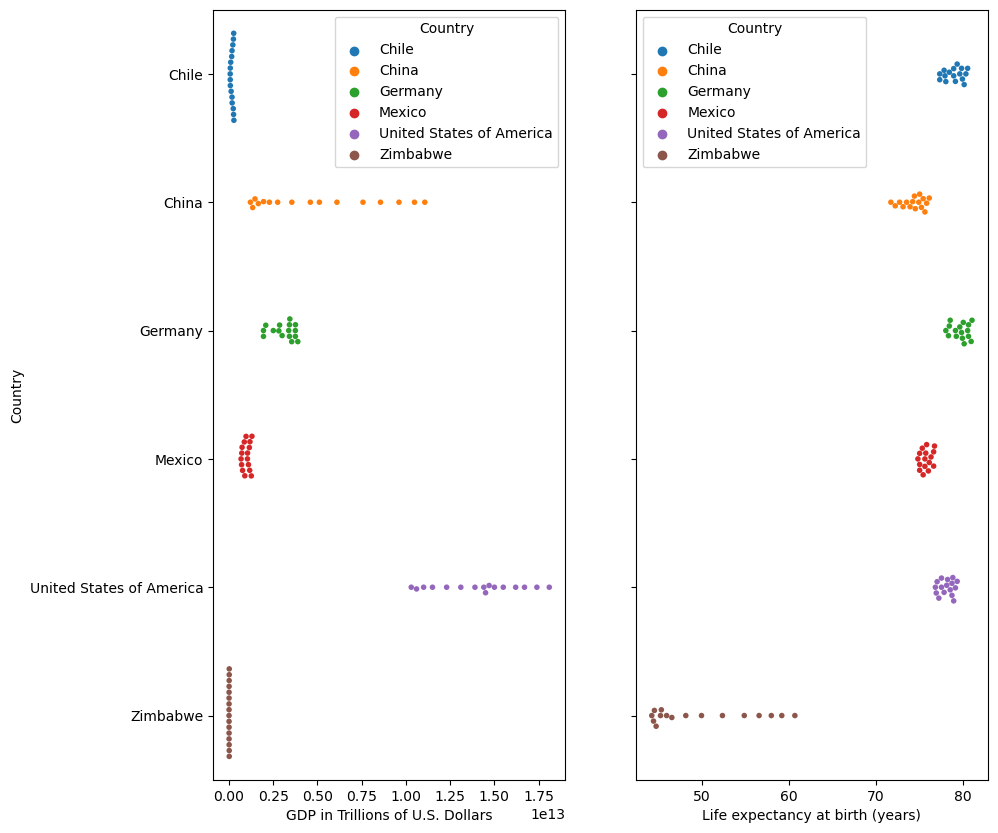

In [25]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country, hue = df.Country, s=4)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country, hue = df.Country, s=4)
axes[1].set_xlabel("Life expectancy at birth (years)");

#### Combine Violin and Swarm Plot

First the stand alone swarm plot is shown and then overlayed on top of a violin plot. 

/home/ericwong/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ericwong/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ericwong/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


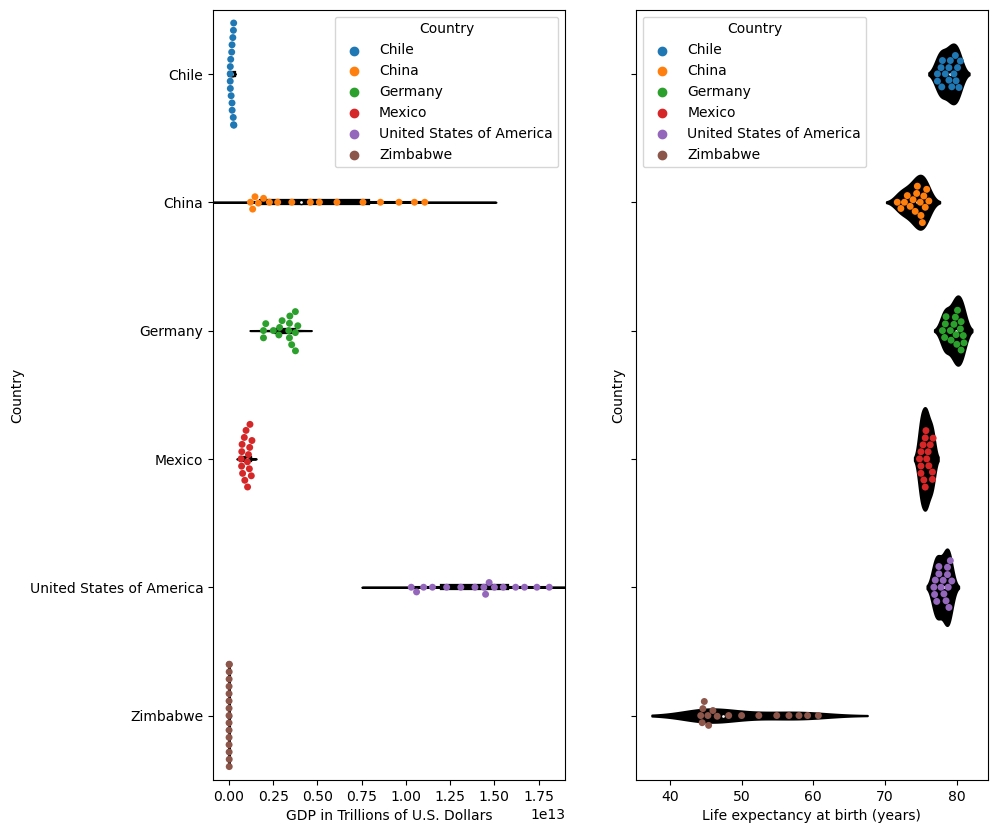

In [29]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country,color = "black", s =4)
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country, hue = df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country, color = "black", s=4)
axes[1] = sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country, hue = df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

## How has GDP changed for the six countries?

#### Using a line plot

A line plot was used to track the changes in GDP of each country between 2000 - 2015.

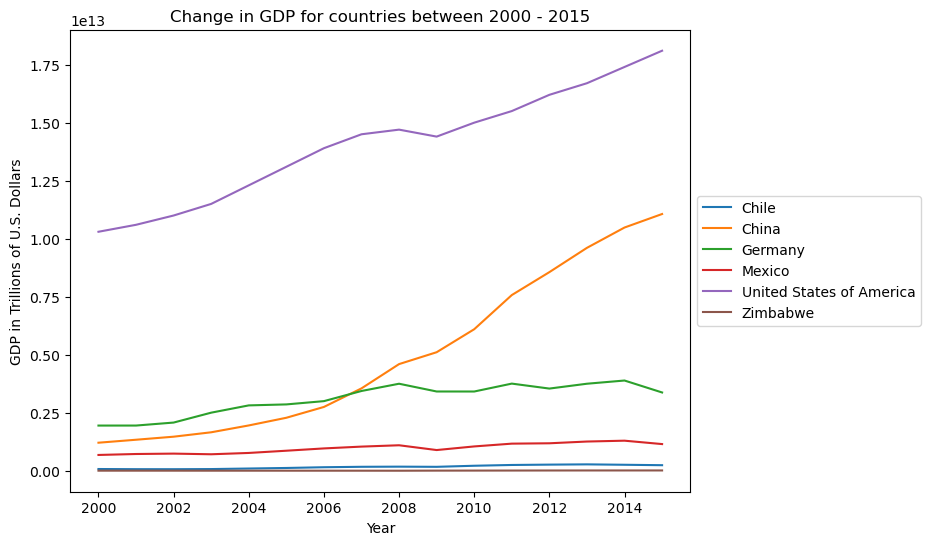

In [57]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Change in GDP for countries between 2000 - 2015')
plt.ylabel("GDP in Trillions of U.S. Dollars");

- It would appear that each country has experienced growth in their GDP from 2000 - 2015; however, countries such as United States of America and China have experienced growth at a higher rate.
- In the early 2000s, Germany had a higher GDP than China. It got surpassed in 2007.
- Facet line plots will be used again to explore these changes in greater detail.

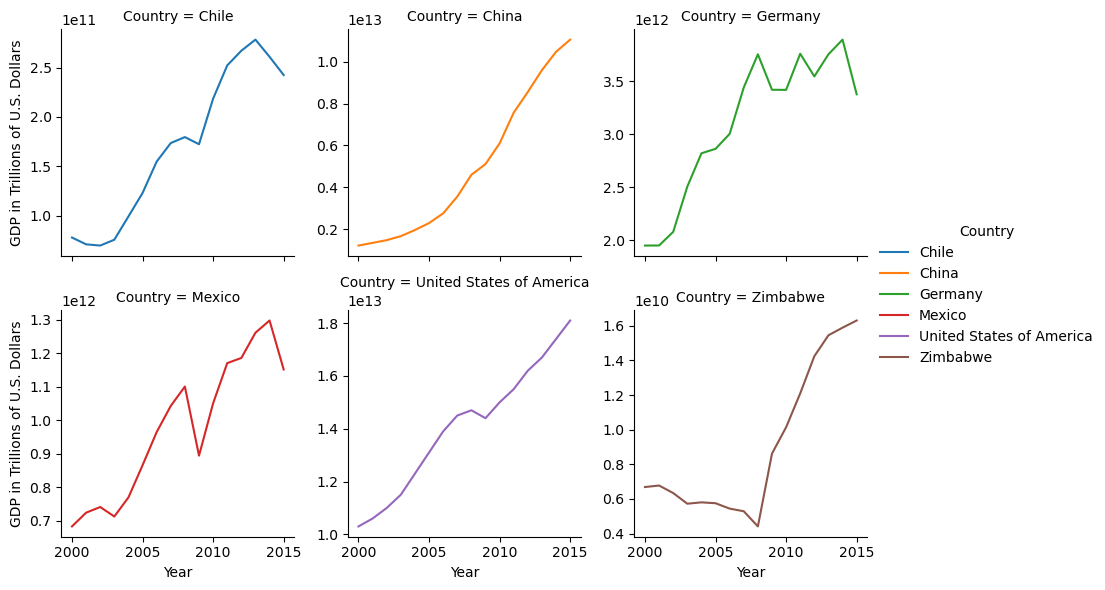

In [58]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP;

- The GDP growth experience by China was exponential compared to the United States of America which was more linear.
- All of the countries did indeed experience growth from the year 2000. Besides China, every country experienced a decline in 2008 due to the global financial crisis. 
- Since the global financial crisis in 2008, it would appear that only Germany has not seen additional growth in its GDP.

## Use a scatterplot to explore the relationship between LEABY and GDP

A scatter plot was used for this section to identify whether there was a correlation between the life expectancy and GDP of the six countries. An additional facet scatter plot was made to ensure the y-axis was scaled appropriately for countries with smaller changes in their GDP.

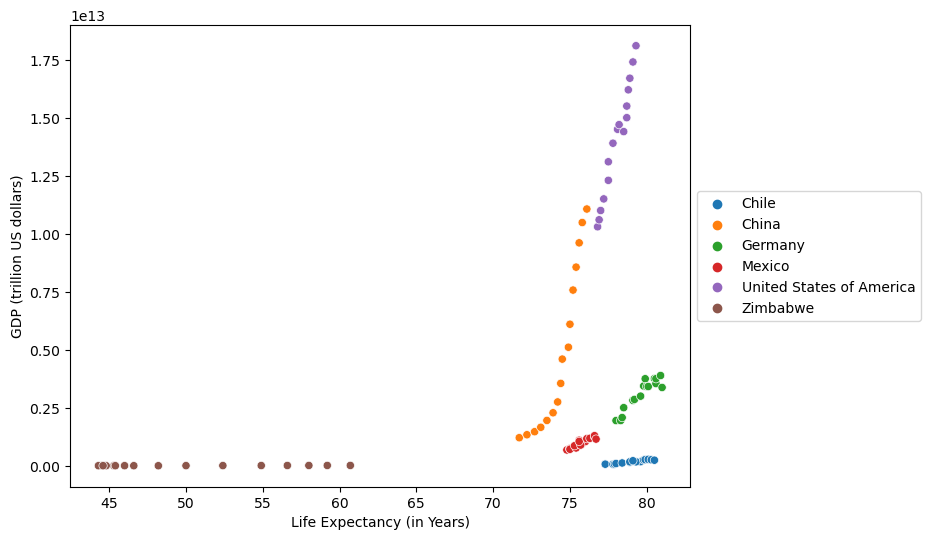

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df.LEABY, y = df.GDP, hue= df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('Life Expectancy (in Years)')
plt.ylabel('GDP (trillion US dollars)')
plt.show();

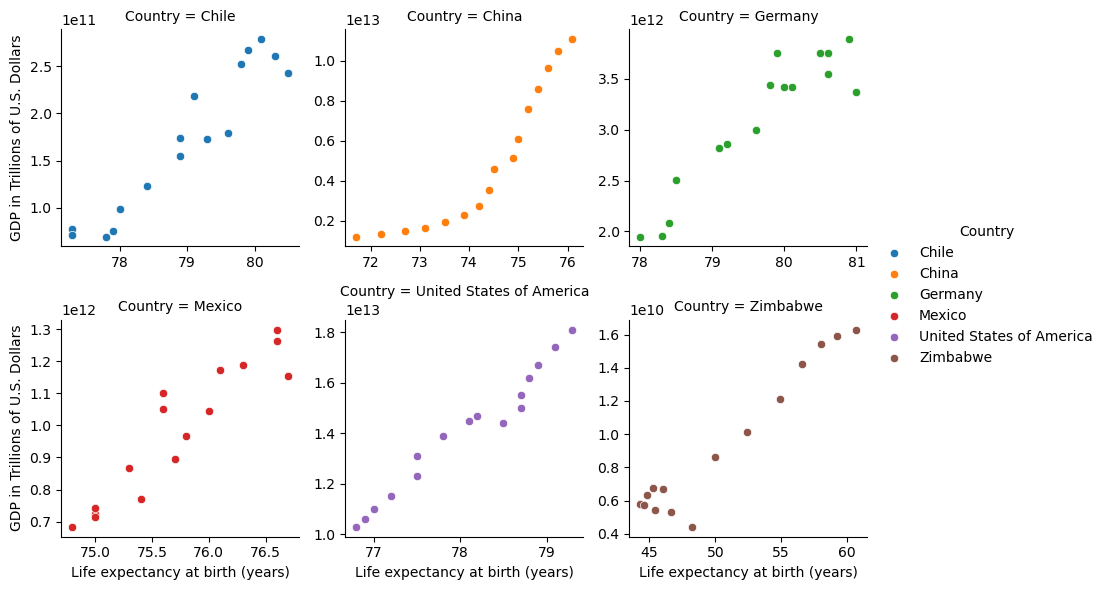

In [40]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

- The facet scatter plot shows that all six countries have a positive correlation between GDP and life expectancy.


# Conclusion

Has life expectancy increased over time in the six nations?
- From the plotted data, there is an evident increase in the life expectancy of all six nations between 2000 - 2015. The general trend has seen all six nations increase the life expectancy of their population; however, for certain countries there were slight decreases during a period of time.
- Between 2000 - 2005, Zimbabwe observed a decrease in the life expectancy of their population from 46.5 to 44.5.
- Between 2007 - 2011, both Mexico and Chile saw slight decreases in their citizen's life expectancy.

Has GDP increased over time in the six nations?
- The GDP of Chile, Germany, Mexico and the United States of America has seen a linear growth in their GDP over the past 15 years.
- China has experienced an exponential growth; however, this growth appeared to be flattening by 2015.

Is there a correlation between GDP and life expectancy of a country?
- There is a positive correlation between GDP and life expectancy.
- This demonstrates that countries where their citizens live longer, the GDP of the country will also grow and vice versa.

What is the average life expectancy in these nations?
- Majority of countries have an average life expectancy in the 70s years old; however, Zimbabwe is in the 50s; it also have the smallest GDP of the six nations that were examined.

What is the distribution of that life expectancy?
- the life expectancy had a left skew, or most of the observations were on the right side.